In [1]:
import numpy as np
from scipy.stats import powerlaw
import matplotlib.pyplot as plt
%matplotlib inline  

In [23]:
a0 = 0.65911332899
a1 = 0.99
mean0, var0, skew0, kurt0 = powerlaw.stats(a0, moments='mvsk')
mean1, var1, skew1, kurt1 = powerlaw.stats(a1, moments='mvsk')
print(mean0, var0, skew0, kurt0)
print(mean1, var1, skew1, kurt1)

0.3972684189037533 0.09004739272861799 0.3742420054268278 -1.1228043934069571
0.49748743718592964 0.08360992877194157 0.008711142072721003 -1.2023137944454259


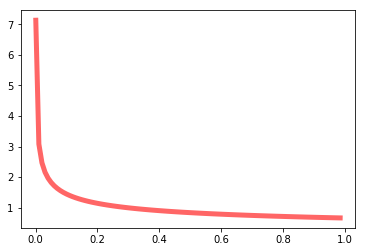

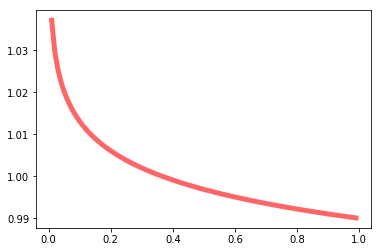

In [24]:
x = np.linspace(powerlaw.ppf(0.01, a0),powerlaw.ppf(0.99, a0), 100)
plt.plot(x, powerlaw.pdf(x, a0), 'r-', lw=5, alpha=0.6, label='powerlaw pdf')
plt.show()

x = np.linspace(powerlaw.ppf(0.01, a1),powerlaw.ppf(0.99, a1), 100)
plt.plot(x, powerlaw.pdf(x, a1), 'r-', lw=5, alpha=0.6, label='powerlaw pdf')
plt.show()

7.96367027987 1.77413685105
9.95955208047 1.62794353176


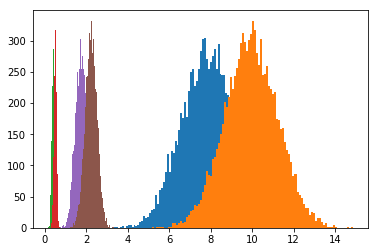

In [29]:
N = 10000                                   #training set
K = 20                                      #sum of K random variables

z0 = np.zeros(N)
z1 = np.zeros(N)
w0 = np.zeros(N)
w1 = np.zeros(N)
c0 = np.zeros(N)
c1 = np.zeros(N)
for i in range(N):
    z0[i] = np.sum(powerlaw.rvs(a0, size=K))               #Observation for hypothesis 0
    z1[i] = np.sum(powerlaw.rvs(a1, size=K))               #Observation hypothesis 1

w0 = z0/K
w1 = z1/K

c0 = z0/np.sqrt(K)
c1 = z1/np.sqrt(K)

print(np.mean(z0), np.std(z0)**2)
print(np.mean(z1), np.std(z1)**2)
plt.hist(z0, bins = 100)
plt.hist(z1, bins = 100)
plt.hist(w0, bins = 100)
plt.hist(w1, bins = 100)
plt.hist(c0, bins = 100)
plt.hist(c1, bins = 100)
plt.show()